## ウェブサイトのURLからQRコードを作成する

まずはプログラムの実行に必要なPythonライブラリをインストールします。
QRコードの作成には、qrcodeとpillowの2つのライブラリを使用します。
pipコマンドでライブラリをインストールしましょう。

Jupyternotebookでは、コードセルの行頭に `!` を付けた内容をコマンドとして処理します。
すなわち、次のコードセルの内容はターミナルで `pip install qrcode[pil] pillow`を実行したときと同じです。

なお、次のセルはコードセルではなくテキストセル扱いになっているので、実際にこのノートブック上でインストールを行う際はセルの種類を`Raw`から`Code`に変換する必要があります。

### 1つのURLからQRコードの生成

pipコマンドにより2つのライブラリのインストールが終わったらPythonでのQRコード生成を行います。
さきほどインストールしたライブラリを `import`によって読み込みましょう。こうすることで`qrcode`や`Image`ライブラリの機能が利用可能となります。

In [1]:
# QRコードの生成に必要なライブラリを読み込む
import qrcode
from PIL import Image

In [2]:
# QRコードにエンコードするテキスト
data = "https://github.com/uribo/exeai"

In [3]:
# QRコードの設定
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4
)

In [4]:
# データをQRコードに追加
qr.add_data(data)
qr.make(fit=True)

In [5]:
# QRコードを画像として生成
img = qr.make_image(fill_color="black", back_color="white")

# img.show()

これでQRコードの生成が完了しました。imgを出力して生成されたQRコードを確認しましょう。

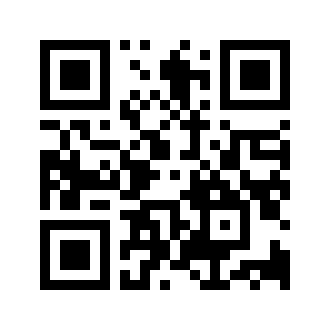

In [6]:
img

In [7]:
# 生成されたQRコード画像をファイルに保存
img.save("qrcode.png")

### 複数のURLからQRコードを生成

続いて複数のURLからQRコードを生成する場合を考えてみます。簡単なのは先ほどの処理の対象となるURLを変更し、何度か同じ処理を実行することですが、こうした繰り返しの処理はプログラミングの得意技です。

`for`構文を使って繰り返しの出力を実現してみましょう。

まず対象のURLを用意します。
これらのURLは同じ処理（QRコードの生成）を行いたいため、`[`を使ってリストに格納します。

In [8]:
# 複数のURLをリストに格納
urls = [
    "https://www.example.com/1",
    "https://www.example.com/2",
    "https://www.example.com/3"
]

In [9]:
# 各URLに対してQRコードを生成し、ファイルに保存
for index, url in enumerate(urls):
    # QRコードの設定
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )

    # データをQRコードに追加
    qr.add_data(url)
    qr.make(fit=True)

    # QRコードを画像として生成
    img = qr.make_image(fill_color="black", back_color="white")

    # 生成されたQRコード画像をファイルに保存（ファイル名は連番）
    img.save(f"qrcode_{index + 1}.png")

上記のコードセルを実行すると、`qrcode_1.png`、`qrcode_2.png`、`qrcode_3.png`の3つの画像ファイルが生成されます。

これらのファイルをノートブック上で表示するにはどうすればよいでしょうか。
これも先ほど同様`for`構文を使って対処します。

qrcode_1.png:


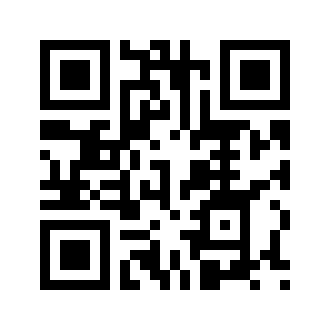



qrcode_2.png:


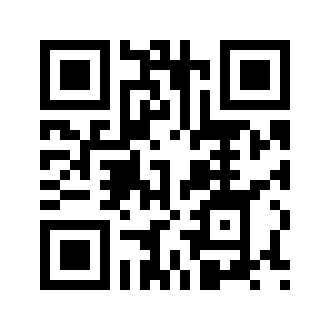



qrcode_3.png:


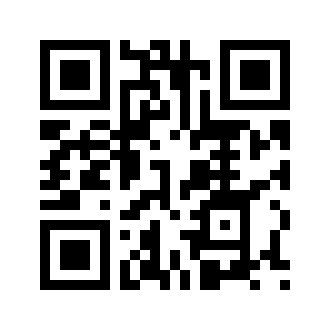

In [10]:
# 画像ファイル名のリスト
image_files = ["qrcode_1.png", "qrcode_2.png", "qrcode_3.png"]

# 各画像ファイルを読み込んで表示
for img_file in image_files:
    img = Image.open(img_file)
    print(f"{img_file}:")
    display(img)
    print("\n")